In [50]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import display, clear_output
from tqdm import tqdm
np.set_printoptions(precision=2)
%matplotlib inline

## Model parameters and architecture

In [51]:
# hidden state size
hidden_dim = 50

# input weights
Wx = np.random.normal(0, 1, (hidden_dim, 1))

# hidden state weights
Wh = np.random.normal(0, 1, (hidden_dim, hidden_dim))

# output weights
Wy = np.random.normal(0, 1, (1, hidden_dim))

# tanh activation function
T = np.tanh

In [52]:
def loss(y_pred, y_opt):
    return 0.5 * (y_pred - y_opt)**2

In [53]:
def cell(xt, ht):
    ht = T(Wx @ xt + Wh @ ht)
    yt = Wy @ ht
    return ht, yt

In [54]:
def forward(xs):
    ht = np.zeros((hidden_dim, 1))
    hs = [ht]
    
    for t in range(len(xs)):
        xt = xs[t]
        ht, yt = cell(xt, ht)
        hs.append(ht)
    return yt, hs

In [55]:
def backward(xs, hs, y, y_true):
    global Wx, Wh, Wy
    dy = y - y_true
    dWy = dy @ hs[-1].T
    dht = Wy.T @ dy
    dWx = np.zeros_like(Wx)
    dWh = np.zeros_like(Wh)

    for t in reversed(range(len(xs))):
        dT = dht * (1 - hs[t+1]**2)
        dWx += dT @ xs[t]
        dWh += dT @ hs[t].T
        dht = Wh.T @ dT
    
    lr = 1e-2
    dWy = np.clip(dWy, -1, 1)
    dWx = np.clip(dWx, -1, 1)
    dWh = np.clip(dWh, -1, 1)
    Wy -= lr * dWy
    Wx -= lr * dWx
    Wh -= lr * dWh

## Methods

In [56]:
def predict(xs):
    return forward(np.expand_dims(xs, axis=(1, 2)))[0].squeeze()

In [57]:
def test(data, start = 0, length = 50):
    y_true, y_pred = [], []
    for i in range(1, len(data)):
        y_true.append(data[i])
        y_pred.append(predict(data[start : i]))

    plt.plot(y_true, linestyle='--')
    plt.plot(y_pred)

In [58]:
def sample(data):
    n = len(data) - 1
    i, j = sorted([np.random.randint(n), np.random.randint(n)])
    if i == j: i, j = 0, n
    return np.expand_dims(data[i:j], (1, 2)), np.expand_dims(data[j], (0, 1))

In [59]:
def train(data, verbose=True, n = None):
    hist = deque(maxlen=1000)
    try:
        n = n or 10000
        for step in tqdm(range(n)):
            xs, y_true = sample(data)
            y, hs = forward(xs)
            backward(xs, hs, y, y_true)
            hist.append(loss(y, y_true).squeeze())

            if verbose and not step % (n//20):
                clear_output(wait=True)
                print(np.mean(hist))
                fig = plt.figure(figsize=(10, 8))
                plt.subplot(211)
                plt.plot(hist)
                plt.subplot(212)
                test(data)
                plt.show()

    except KeyboardInterrupt:
        ...

## Data generation

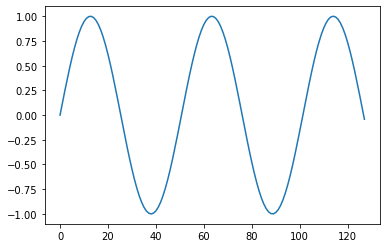

In [60]:
# X ~ (samples, values, 1, 1)
# Y ~ (samples, 1, 1)
dataset_size = 128
sine = np.sin(np.linspace(0, 15.75, dataset_size))
p = plt.plot(sine)

## Train and test the model

0.003650470185439718


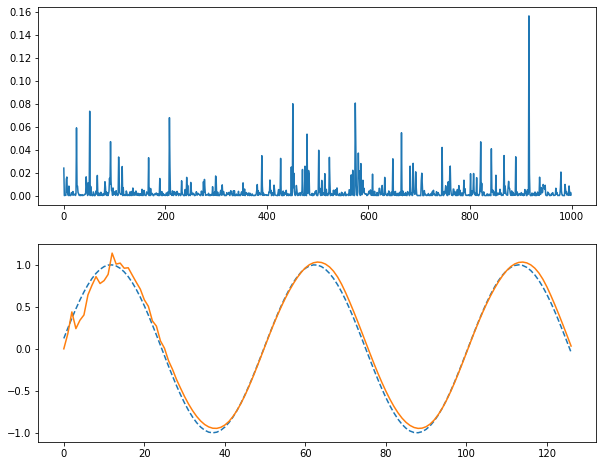

100%|██████████| 100000/100000 [02:41<00:00, 619.59it/s]


In [61]:
train(sine, n = 100000)